In [2]:
%matplotlib inline

# Phonon linewidth and thermal conductivity

With phonons and their interactions computed, we can use these coefficients to compute thermodynamic properties including phonon linewidth and thermal conductivity.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from principia_materia import Fraction
from principia_materia.io_interface import parse_array
from principia_materia.io_interface.vasp import parse_poscar
from principia_materia.translation_group import get_structure, CrystalFTG
from principia_materia.phonon_id.fourier_interpolation import (
    FourierInterpolation,
    save_FourierInterpolation_to_hdf5,
    get_FourierInterpolation_from_hdf5,
    )
from principia_materia.phonon_id.conductivity import Conductivity

In [4]:
pg = "Oh"
order = 2
supa = 3 * np.array([
  [1, 0, 0],
  [0, 1, 0],
  [0, 0, 1],
  ])
temperature = np.linspace(0, 1000, 101)

In [5]:
structure = get_structure(parse_poscar("tho2_linewidth/POSCAR"), stype=CrystalFTG)
structure.species_names = ["Th", "O"]
structure.orbitals = "p"

In [6]:
cond = Conductivity(
    structure=structure,
    mesh=supa,
    pg=pg,
    )

cond.set_Phi("tho2_linewidth/order2/fi_mesh444.hdf5",  order=2)
cond.set_Phi("tho2_linewidth/order3/fi_meshsBcc.hdf5", order=3)

In [7]:
qpoint = np.array(parse_array("1/2 0 0", dtype=Fraction))
qpoint

array([Fraction(1, 2), Fraction(0, 1), Fraction(0, 1)], dtype=object)

In [8]:
gamma = cond.gamma_tetra_at_phonon(qpoint=qpoint, temperature=temperature, phonon_cutoff=1.0E-4)

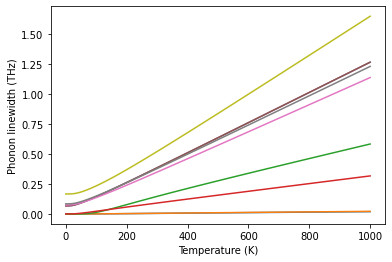

In [9]:
lines = plt.plot(temperature, gamma)
plt.xlabel("Temperature (K)")
plt.ylabel("Phonon linewidth (THz)")
plt.savefig("tho2_linewidth.pdf")

In [10]:
conductivity = cond.thermal_conductivity_RTA(temperature=temperature, phonon_cutoff=1.0E-4)

iq =  0  q =  [Fraction(0, 1) Fraction(0, 1) Fraction(0, 1)]
iq =  1  q =  [Fraction(1, 3) Fraction(0, 1) Fraction(0, 1)]
iq =  2  q =  [Fraction(2, 3) Fraction(0, 1) Fraction(0, 1)]
iq =  3  q =  [Fraction(0, 1) Fraction(1, 3) Fraction(0, 1)]
iq =  4  q =  [Fraction(1, 3) Fraction(1, 3) Fraction(0, 1)]
iq =  5  q =  [Fraction(2, 3) Fraction(1, 3) Fraction(0, 1)]
iq =  6  q =  [Fraction(0, 1) Fraction(2, 3) Fraction(0, 1)]
iq =  7  q =  [Fraction(1, 3) Fraction(2, 3) Fraction(0, 1)]
iq =  8  q =  [Fraction(2, 3) Fraction(2, 3) Fraction(0, 1)]
iq =  9  q =  [Fraction(0, 1) Fraction(0, 1) Fraction(1, 3)]
iq =  10  q =  [Fraction(1, 3) Fraction(0, 1) Fraction(1, 3)]
iq =  11  q =  [Fraction(2, 3) Fraction(0, 1) Fraction(1, 3)]
iq =  12  q =  [Fraction(0, 1) Fraction(1, 3) Fraction(1, 3)]
iq =  13  q =  [Fraction(1, 3) Fraction(1, 3) Fraction(1, 3)]
iq =  14  q =  [Fraction(2, 3) Fraction(1, 3) Fraction(1, 3)]
iq =  15  q =  [Fraction(0, 1) Fraction(2, 3) Fraction(1, 3)]
iq =  16  q =  [Fr

In [11]:
x, y = np.array([(0, 0), (1, 1), (2, 2), (0, 1), (1, 2), (0, 2)]).T

In [12]:
kappa = conductivity[:, x, y]

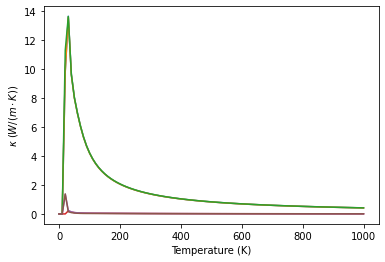

In [22]:
lines = plt.plot(temperature, kappa)
plt.ylabel(r"$\kappa$ $(W/(m \cdot K))$")
plt.xlabel("Temperature (K)")
plt.savefig("tho2_conductivity.pdf")